In [1]:
# the two previous files were used to preprocess the csv dataset
# in this file, I will just implement a basic MLP (multilayer preceptron)
# from sckit learn, just to see if the model is able to learn something on the 
# data or not

# its important not to forget that the model will take in as input
# a series of data over time (it can be one type of data like CPU usage
# as it can be mulitple, like cpu and memoery usage ..) and will ouput something, which
# logically should be the next data item in time

# in this model here, it will take in as input only the CPU usage and try to predict
# the average next CPU usage

In [2]:
# the imports

import glob
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from matplotlib import colors as mcolors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
num_classes = 20
sample_history = 10

In [4]:
def load_data():
    path = "../SecondPreProcess/*.csv"
    data = []
    labels = []

    print("loading data...")

    for fname in glob.glob(path):
        with open(fname, 'r') as infh:
            reader = csv.reader(infh, delimiter=';')
            
            for row in reader:
                r = np.array(row, dtype = float)
                rr = []
                for i in range(sample_history):
                    rr.append(r[i*7+1])
                #print(rr)
                data.append(rr)
                labels.append(r[-1])
 
    data = np.array(data)
    labels = np.array(labels)
    n = int(float(data.shape[0]) * 0.8)
    train_data = data[:n]
    train_labels = labels[:n]
    test_data = data[n:]
    test_labels = labels[n:]
    print("finished loading data")
    return train_data, train_labels, test_data, test_labels

In [8]:
train_data, train_labels, test_data, test_labels = load_data()

loading data...
finished loading data


In [7]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(72236, 10)
(288941,)


In [18]:
def grid_search(param_grid, clf, train_data, train_labels):
    grid = GridSearchCV(clf, param_grid=param_grid, verbose=10)
    grid.fit(train_data, train_labels)
    print("Best: {0}".format(grid.best_estimator_))
    return grid.best_estimator_


In [19]:
def train(train_data, train_labels, test_data, test_labels):
    param_grid = {
        "alpha":[0.01]
    }
    clf = MLPClassifier()
    clf = grid_search(param_grid, clf, train_data, train_labels)
    print("Train accuracy = {}".format(clf.score(train_data, train_labels)))
    print("Test accuracy = {}".format(clf.score(test_data, test_labels)))

    #confusion matrix
    # test_pred = clf.predict(test_data)
    return clf


In [20]:
train_data, train_labels, test_data, test_labels = load_data()
clf = train(train_data, train_labels, test_data, test_labels)

loading data...
finished loading data
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START alpha=0.01..................................................
[CV 1/5; 1/1] END ...................alpha=0.01;, score=0.927 total time=10.6min
[CV 2/5; 1/1] START alpha=0.01..................................................
[CV 2/5; 1/1] END ...................alpha=0.01;, score=0.900 total time= 9.7min
[CV 3/5; 1/1] START alpha=0.01..................................................
[CV 3/5; 1/1] END ...................alpha=0.01;, score=0.892 total time=10.8min
[CV 4/5; 1/1] START alpha=0.01..................................................
[CV 4/5; 1/1] END ...................alpha=0.01;, score=0.915 total time= 7.1min
[CV 5/5; 1/1] START alpha=0.01..................................................
[CV 5/5; 1/1] END ...................alpha=0.01;, score=0.909 total time= 8.0min


C:\Users\XL892PG\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best: MLPClassifier(alpha=0.01)
Train accuracy = 0.9204266614983682
Test accuracy = 0.8904839692120272


In [23]:
import joblib
joblib.dump(clf, 'model_file_name.pkl')
# to load model = joblib.load("model_file_name.pkl")

['model_file_name.pkl']

In [6]:
train_data, train_labels, test_data, test_labels = load_data()
import joblib
model = joblib.load("model_file_name.pkl")

In [7]:
test_pred = model.predict(test_data)

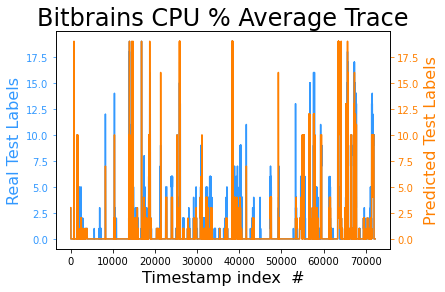

In [17]:
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

color_one = '#3399FF'
color_two = '#FF8000'

fig, ax1 = plt.subplots()

t = np.arange(0, test_data.shape[0])
ax1.plot(t, test_labels, color=color_one)
ax1.set_xlabel('Timestamp index  #', )
ax1.set_ylabel('Real Test Labels', color=color_one)
ax1.tick_params('y', colors=color_one)

ax2 = ax1.twinx()
ax2.plot(t, test_pred, color=color_two)
ax2.set_ylabel('Predicted Test Labels', color=color_two)
ax2.tick_params('y', colors=color_two)

plt.title("Bitbrains CPU % Average Trace", fontsize=24)

plt.show()

In [10]:
test_pred = model.predict(test_data)
train_pred = model.predict(train_data)

In [15]:
train_pred.shape

(288941,)

In [16]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_labels, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(test_labels, test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.89 RMSE
Test Score: 0.94 RMSE
